# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [61]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

In [62]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [63]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [64]:
item_orders = chipo.groupby('item_name').sum().reset_index()
item_orders

,item_name,order_id,quantity,choice_description,item_price
0,6 Pack Soft Drink,52322,55,[Sprite][Diet Coke][Coke][Diet Coke][Diet Coke...,$6.49 $6.49 $6.49 $6.49 $6.49 $6.49 $6.49 $6.4...
1,Barbacoa Bowl,53972,66,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.75 $11.75 $9.25 $8.99 $9.25 $11.75 $9.25 $...
2,Barbacoa Burrito,74718,91,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$8.99 $9.25 $9.25 $11.75 $11.75 $9.25 $8.99 $1...
3,Barbacoa Crispy Tacos,5613,12,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75 $9.25 $11.48 $11.75 $9.25 $9.25 $8.99 $...
4,Barbacoa Salad Bowl,9708,10,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",$11.89 $11.89 $9.39 $9.39 $9.39 $11.89 $11.89 ...
5,Barbacoa Soft Tacos,18725,25,"[Fresh Tomato Salsa, [Fajita Vegetables, Black...",$9.25 $9.25 $8.99 $9.25 $9.25 $11.75 $11.75 $9...
6,Bottled Water,175944,211,0,$1.09 $1.09 $1.09 $1.50 $1.50 $1.50 $3.00 $1.5...
7,Bowl,472,4,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20 $7.40
8,Burrito,1550,6,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",$7.40 $7.40 $7.40 $7.40 $7.40 $7.40
9,Canned Soda,76396,126,[Sprite][Dr. Pepper][Mountain Dew][Sprite][Dr....,$2.18 $1.09 $2.18 $1.09 $1.09 $1.09 $1.09 $2.1...


In [65]:
top_orders = item_orders.sort_values(by="quantity", ascending=False).head(5)

In [66]:
top_orders

,item_name,order_id,quantity,choice_description,item_price
17,Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...
18,Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...
25,Chips and Guacamole,449959,506,0,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.9...
39,Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8...
10,Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,$1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.2...


Now, we go ahead to visualise(Creating the plot) the top 5 items sold using a histogram :

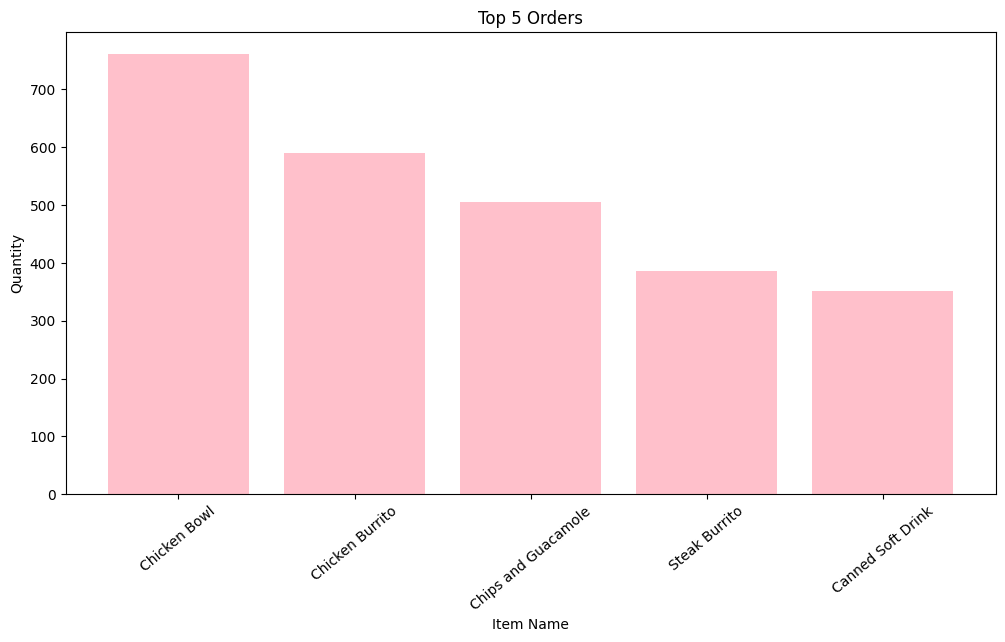

In [80]:
# set the figure 
plt.figure(figsize=(12,6))

# plotting the data using the plt.bar()

plt.bar(top_orders['item_name'], top_orders['quantity'], color='pink')

# Labeling Axes Y and X : 

plt.xlabel("Item Name")
plt.ylabel("Quantity")

# Adding a title 
plt.title("Top 5 Orders")

#Rotating the x axis , so that the item names do not overlap

plt.xticks(rotation=40)

#Display the plot

plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Leann :How to create a scatter plot :

We can create a scatter plot using the build in function plot.scatter():

Syntax :

df.plot.scatter(x='x_column_name', y='y_column_name')


NameError: name 'data' is not defined

### Step 7. BONUS: Create a question and a graph to answer your own question.